Synthetic Discount Data:
   Year          Product Platform    Base_Price  Discount_Percentage  \
0  2013       Smartphone   Amazon  43708.610696            69.139027   
1  2013           Laptop   Amazon  95564.287577            24.523316   
2  2013       Television   Amazon  75879.454763            50.328133   
3  2013       Headphones   Amazon  63879.263578            55.697177   
4  2013  Washing Machine   Amazon  24041.677640            24.258253   

   Discounted_Price  
0      13488.902438  
1      72128.755073  
2      37690.741968  
3      28300.317128  
4      18209.586739  

Descriptive Statistics:
              Year    Base_Price  Discount_Percentage  Discounted_Price
count   154.000000    154.000000           154.000000        154.000000
mean   2018.000000  52495.922761            41.226663      30664.212926
std       3.172595  26687.818247            17.358397      18557.533222
min    2013.000000  10496.990541            10.303695       3319.081933
25%    2015.000000  29330

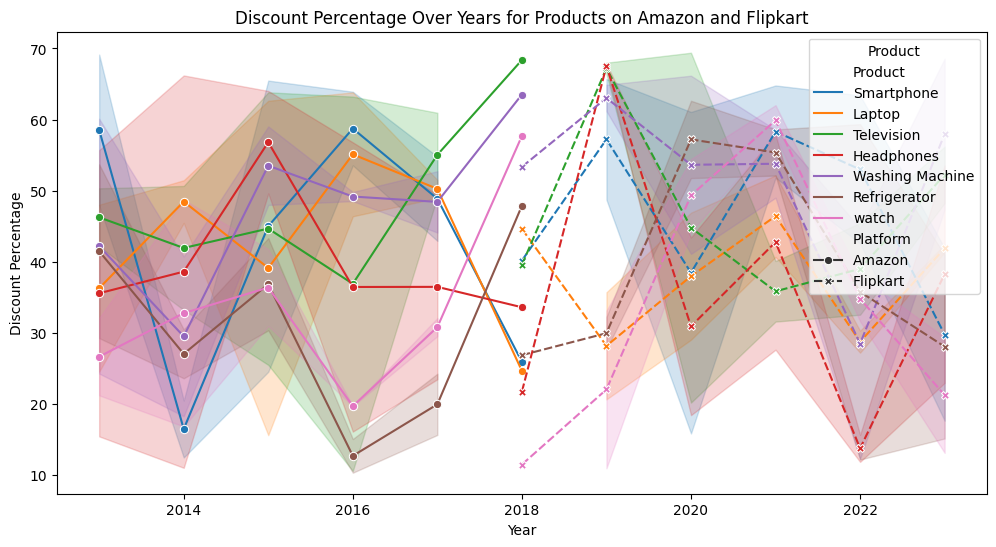

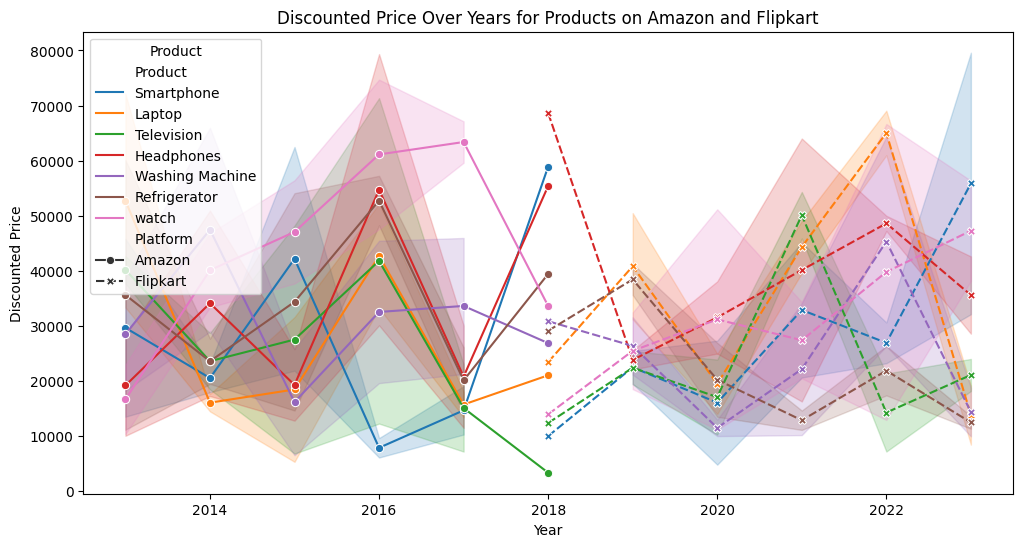


Average Discounted Price for Amazon and Flipkart:
Platform
Amazon      31912.174785
Flipkart    29416.251066
Name: Discounted_Price, dtype: float64

Average Discount Percentage for Amazon and Flipkart:
Platform
Amazon      40.340106
Flipkart    42.113221
Name: Discount_Percentage, dtype: float64

Average Discounted Price by Product and Platform:
Platform               Amazon      Flipkart
Product                                    
Headphones       31943.715275  38903.711333
Laptop           28381.485543  35473.561744
Refrigerator     33829.124252  21877.248081
Smartphone       26228.700337  28929.466474
Television       27230.372204  23819.049270
Washing Machine  31210.934274  24545.061983
watch            44560.891613  32365.658579

Future Predictions:
   Year     Product    Base_Price  Amazon_Discount  Amazon_Price  \
0  2024  Smartphone  81566.757529        26.249935  60155.536634   
1  2025  Smartphone  17061.074321        11.521045  15095.460338   
2  2026  Smartphone  85238.210

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the seed for reproducibility
np.random.seed(42)

# Generate synthetic data
years = np.arange(2013, 2024)  # Historical years
products = ['Smartphone', 'Laptop', 'Television', 'Headphones', 'Washing Machine', 'Refrigerator', 'watch']
platforms = ['Amazon', 'Flipkart']

# Creating synthetic dataset
data = {
    'Year': np.repeat(years, len(products) * len(platforms)),
    'Product': np.tile(products, len(years) * len(platforms)),
    'Platform': np.repeat(platforms, len(years) * len(products)),
    'Base_Price': np.random.uniform(10000, 100000, len(years) * len(products) * len(platforms)),
    'Discount_Percentage': np.random.uniform(10, 70, len(years) * len(products) * len(platforms)),
}

# Create DataFrame from the generated data
discount_data = pd.DataFrame(data)
discount_data['Discounted_Price'] = discount_data['Base_Price'] * (1 - discount_data['Discount_Percentage'] / 100)

# Save synthetic data to CSV
discount_data.to_csv('synthetic_discount_data_amazon_flipkart.csv', index=False)

# Display the first few rows of the dataset
print("Synthetic Discount Data:")
print(discount_data.head())

# ======================== Data Analysis =========================

# 1. Descriptive statistics of the data
print("\nDescriptive Statistics:")
print(discount_data.describe())

# 2. Plotting the Discount Percentage for each product over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=discount_data, x='Year', y='Discount_Percentage', hue='Product', style='Platform', markers=True)
plt.title('Discount Percentage Over Years for Products on Amazon and Flipkart')
plt.xlabel('Year')
plt.ylabel('Discount Percentage')
plt.legend(title='Product')
plt.show()

# 3. Plotting the Discounted Price for each product over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=discount_data, x='Year', y='Discounted_Price', hue='Product', style='Platform', markers=True)
plt.title('Discounted Price Over Years for Products on Amazon and Flipkart')
plt.xlabel('Year')
plt.ylabel('Discounted Price')
plt.legend(title='Product')
plt.show()

# 4. Comparing average discounted prices between Amazon and Flipkart
avg_discounted_price = discount_data.groupby('Platform')['Discounted_Price'].mean()
print("\nAverage Discounted Price for Amazon and Flipkart:")
print(avg_discounted_price)

# 5. Comparing average discount percentage between Amazon and Flipkart
avg_discount_percentage = discount_data.groupby('Platform')['Discount_Percentage'].mean()
print("\nAverage Discount Percentage for Amazon and Flipkart:")
print(avg_discount_percentage)

# 6. Average Discounted Price by Product and Platform
product_comparison = discount_data.groupby(['Product', 'Platform'])['Discounted_Price'].mean().unstack()
print("\nAverage Discounted Price by Product and Platform:")
print(product_comparison)

# ======================== Predicting Future Discounts =========================

# Predict discounts for the next 10 years (2024-2033)
future_years = np.arange(2024, 2034)
future_products = np.tile(products, len(future_years))

# Generate synthetic future data (for simplicity, using random values for predictions)
future_predictions = []

for product in products:
    for year in future_years:
        base_price = np.random.uniform(10000, 100000)
        amazon_discount = np.random.uniform(10, 70)  # Random discount prediction for Amazon
        flipkart_discount = np.random.uniform(10, 70)  # Random discount prediction for Flipkart

        amazon_price = base_price * (1 - amazon_discount / 100)
        flipkart_price = base_price * (1 - flipkart_discount / 100)

        better_platform = 'Amazon' if amazon_price < flipkart_price else 'Flipkart'

        future_predictions.append({
            'Year': year,
            'Product': product,
            'Base_Price': base_price,
            'Amazon_Discount': amazon_discount,
            'Amazon_Price': amazon_price,
            'Flipkart_Discount': flipkart_discount,
            'Flipkart_Price': flipkart_price,
            'Better_Platform': better_platform
        })

# Create DataFrame for future predictions
future_df = pd.DataFrame(future_predictions)

# Display the first few rows of the future predictions
print("\nFuture Predictions:")
print(future_df.head())

# ======================== Platform Recommendation =========================

# Display the recommended platform for each product and year
recommendations = future_df.groupby(['Year', 'Product'])['Better_Platform'].first().reset_index()

print("\nPlatform Recommendations for Future Years (2024-2033):")
print(recommendations)

# ======================== Additional Insights =========================

# Frequency of platform recommendation per product
platform_recommendation = recommendations.groupby('Product')['Better_Platform'].value_counts().unstack()
print("\nFrequency of Platform Recommendation per Product:")
print(platform_recommendation)
